# ENSEMBLE LEARNING PROJECT - SOLUTION

### Developed By: Olabode James

#### Project Goal: Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs

# In order to enable plotting graphs in Jupyter notebook
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassificationReport, ROCAUC

#Ensembles Tools
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

import statsmodels.api as sm

from IPython.display import Image  
#import pydotplus as pydot

from sklearn import tree
from os import system

#Visualizing Decision Tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
#import graphviz

#Need to handle warnings
import warnings
warnings.filterwarnings('ignore')

### Load Dataset and Initial Data EDA

In [2]:
bankData = pd.read_csv("bank-full.csv")
bankData.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bankData.shape

(45211, 17)

In [5]:
bankData.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [6]:
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#Check For duplicates 
dupes = bankData.duplicated()
sum(dupes)

0

### 1. Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

#### 1.1 Univariate analysis (12 marks)

#### 1.1.1 Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

#### 1.1.2 Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

#### 1.1.3 Please provide comments in jupyter notebook regarding the steps you take andinsights drawn from the plots.

In [9]:
#Datatypes of independent attributes
bankData.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [10]:
#Description of independent attributes
bankData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [11]:
#We need to handle education - as unknown provide no feedback - we expected Three values, but can see four
print(bankData.education.value_counts())
print()
print(bankData.job.value_counts())
print()
print(bankData.contact.value_counts())
print()
print(bankData.poutcome.value_counts())
print()
print(bankData.month.value_counts())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


##### Very good, there are no data duplication - we can thus focus on handling nulls in education

In [12]:
#Here we check for null entry in our dataset
bankData.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [13]:
#Education seems to have 4 entries, as against the expected 3 of - primary, secondary and Tertiary
print(bankData.education.mode())

0    secondary
dtype: object


In [14]:
mode = bankData['education'].mode()
bankData.loc[bankData.education == 'unknown', 'education'] = mode[0]
print(bankData.education.value_counts())

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64


In [15]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame(bankData.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [16]:
#MORE EDA: Wrong Imputations: Here we check if non-numbers/numeric/real has been entered in any of the numerical columns
bankData.applymap(np.isreal).any()

age           True
job          False
marital      False
education    False
default      False
balance       True
housing      False
loan         False
contact      False
day           True
month        False
duration      True
campaign      True
pdays         True
previous      True
poutcome     False
Target       False
dtype: bool

In [ ]:
#In view of above: job, marital, education, default, housing, loan, contact, month, poutcome and Target are type objects
#Which is consistent with dTypes for the attributes - 
#Conclusion: all the numeric attribute have real imputations

In [17]:
#Analysing Data Distribution
#We will pick the following independent attributes for analysis - age, job, marital,education, default, 
#housing, loan, contact, duration, campaign, pdays, previous,poutcome and Target

In [18]:
ageAnalysis = bankData['age']
jobAnalysis = bankData['job']
maritalAnalysis = bankData['marital']
eduAnalysis = bankData['education']
defaulterAnalysis = bankData['default']
housingAnalysis = bankData['housing']
loanAnalysis = bankData['loan']
contactAnalysis = bankData['contact']
poutAnalysis = bankData['poutcome']
durationAnalysis = bankData['duration']
campaignAnalysis = bankData['campaign']
targetAnalysis = bankData['Target']

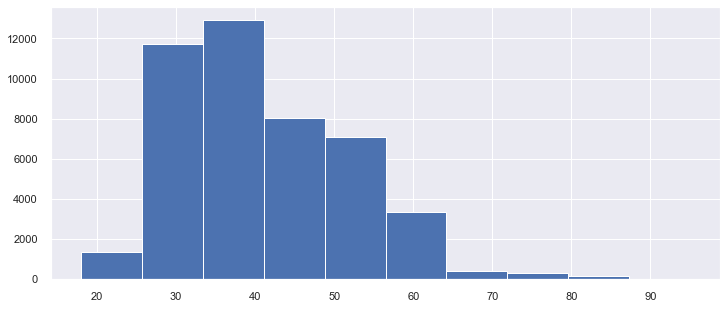

In [19]:
#Checking age Distribution For our bank's current depositors dataset
plt.figure(figsize=(12,5))
plt.hist(ageAnalysis);

##### INSIGHT: There is large number of young people in the dataset - this can be said to be representative of the general working population People retire as they get older

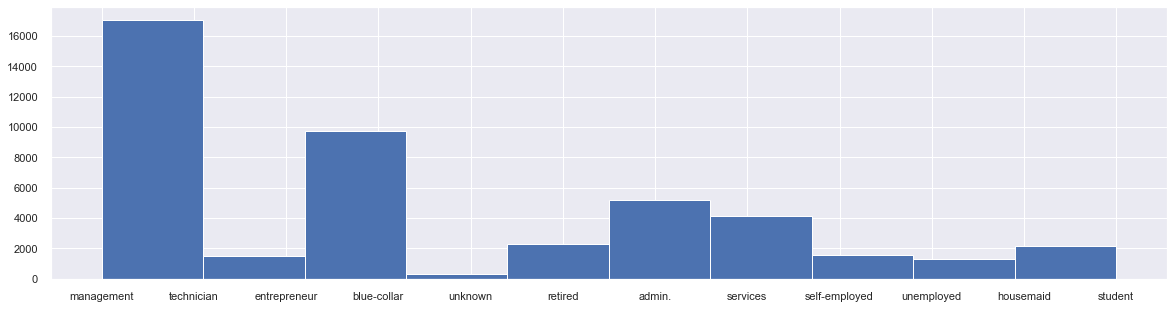

In [20]:
#Checking job Distribution For our bank's current depositors dataset
plt.figure(figsize=(20,5))
plt.hist(jobAnalysis);

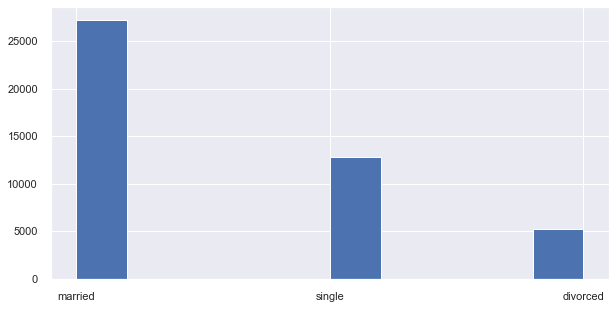

In [21]:
#Checking marital status Distribution For our bank's current depositors dataset
plt.figure(figsize=(10,5))
plt.hist(maritalAnalysis);

##### INSIGHT: Large number of married people in the dataset - representative of people with interest in an investment account like Term deposit in a financial institution

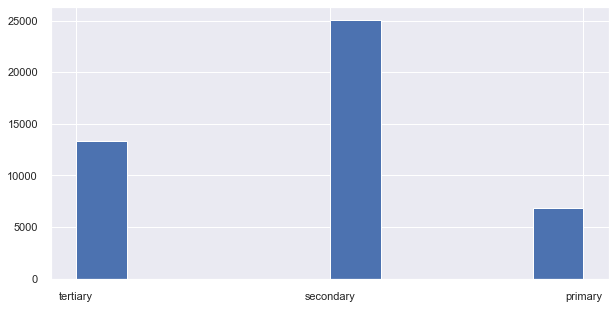

In [22]:
#Checking education Distribution For our bank's current depositors dataset
plt.figure(figsize=(10,5))
plt.hist(eduAnalysis);

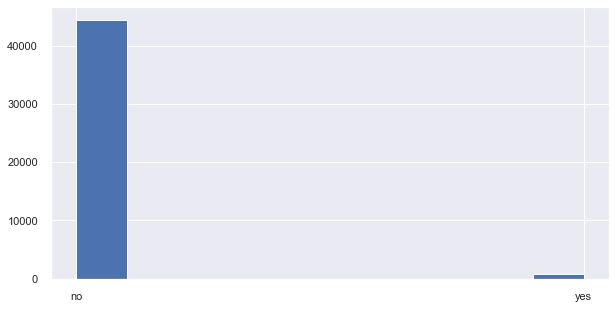

In [23]:
#Checking Defaulter Distribution For our bank's current depositors dataset
plt.figure(figsize=(10,5))
plt.hist(defaulterAnalysis);

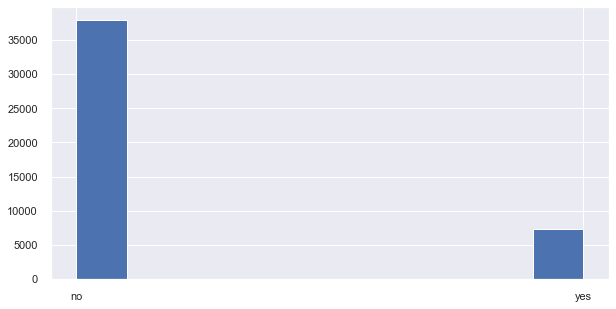

In [24]:
#Checking Defaulter Distribution For our bank's current depositors dataset
plt.figure(figsize=(10,5))
plt.hist(loanAnalysis);

##### INSIGHT: Campaign did well to target fewer people with existing loans

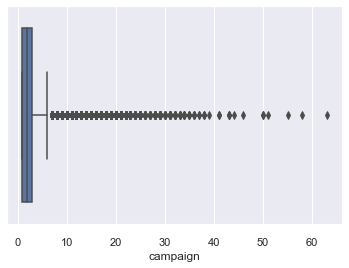

In [25]:
#Outlier analysis for pday, campaign, duration and previous
sns.boxplot(campaignAnalysis);

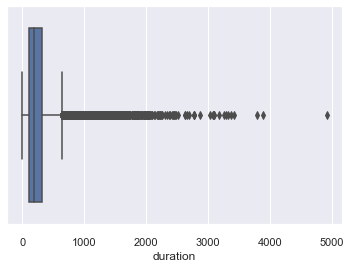

In [26]:
sns.boxplot(durationAnalysis);

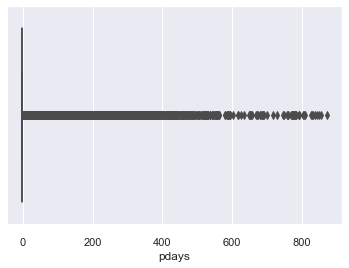

In [27]:
sns.boxplot(bankData['pdays']);

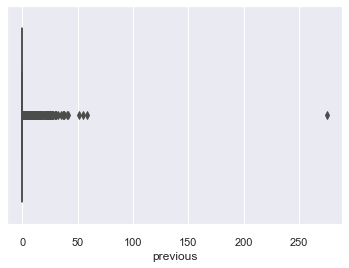

In [28]:
sns.boxplot(bankData['previous']);

##### INSIGHT: There are outliers in previous, pdays,  duration, and campaign attributes, however due to scope of this task - these cannot be taken to be data pollution, but expected in marketing campaign efforts of this type - thus, they will be left as is and the ML model will be allowed to handle influence on the Target variable on merits.

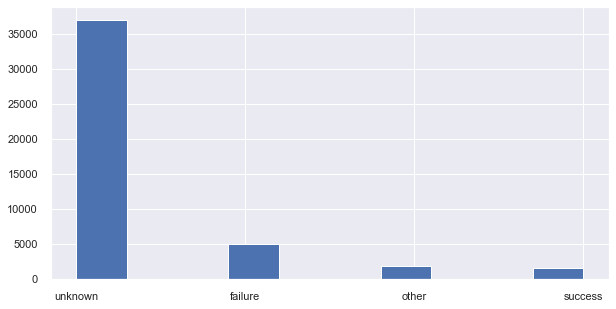

In [29]:
#Checking poutcome Distribution For the bank's current depositors dataset
plt.figure(figsize=(10,5))
plt.hist(poutAnalysis);

In [30]:
#This will help me examine the fact in the problem statement
bankData['poutcome'].value_counts(normalize=True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

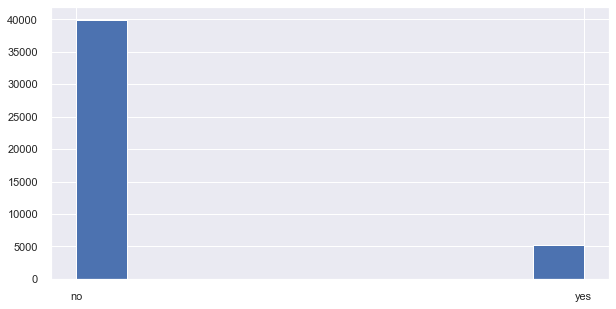

In [31]:
#Checking Target Distribution For our bank's current depositors dataset
plt.figure(figsize=(10,5))
plt.hist(targetAnalysis);

In [32]:
bankData.groupby('Target')['Target'].count()

Target
no     39922
yes     5289
Name: Target, dtype: int64

In [33]:
#This will help me examine the fact in the problem statement, in which 9.6% only took personal loan the last time
bankData['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

### INSIGHT: 11. 7% Success rate in the last effort of the bank towards conversion of existing customers to term depositors.

#### 1.2 Multivariate analysis (8 marks)

#### 1.2.1 Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

#### 1.2.2 Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

In [ ]:
#My interest here is in examining relationship between Target and marital, education, balance, loan, housing and defaulters

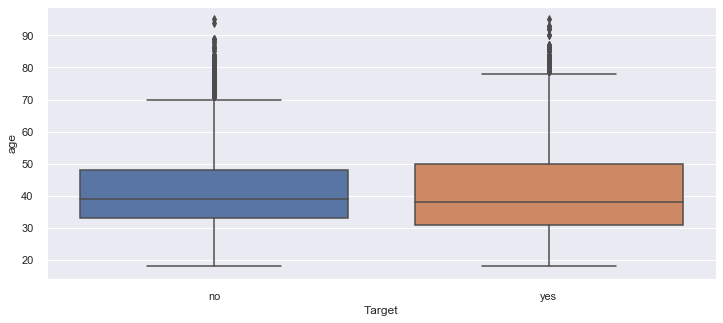

In [34]:
plt.figure(figsize=(12,5))
sns.boxplot(bankData['Target'], bankData['age']);

#### INSIGHT: 1. Median age of customers that subscribed to Term Deposit is lower than those who didn't not. 

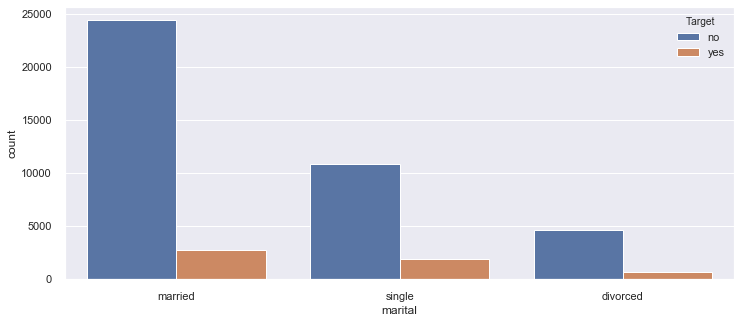

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(bankData['marital'], hue=bankData['Target']);

##### INSIGHT: Seems Singles are more likely to subscribe to Term Deposits than married people - this might also explain the slightly lower median age for subscribers compared to non-subscribers.

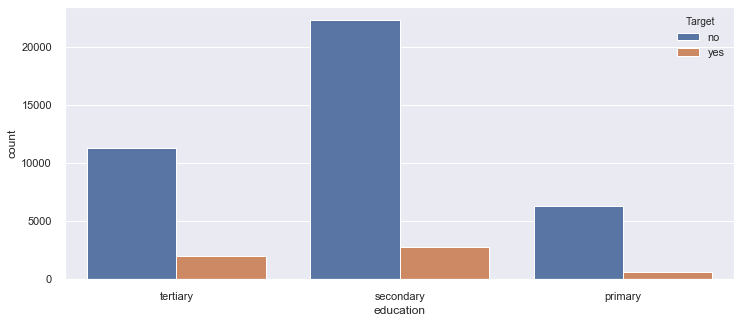

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(bankData['education'], hue=bankData['Target']);

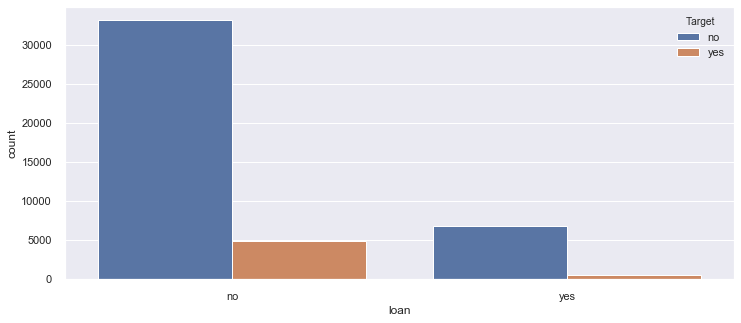

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(bankData['loan'], hue=bankData['Target']);

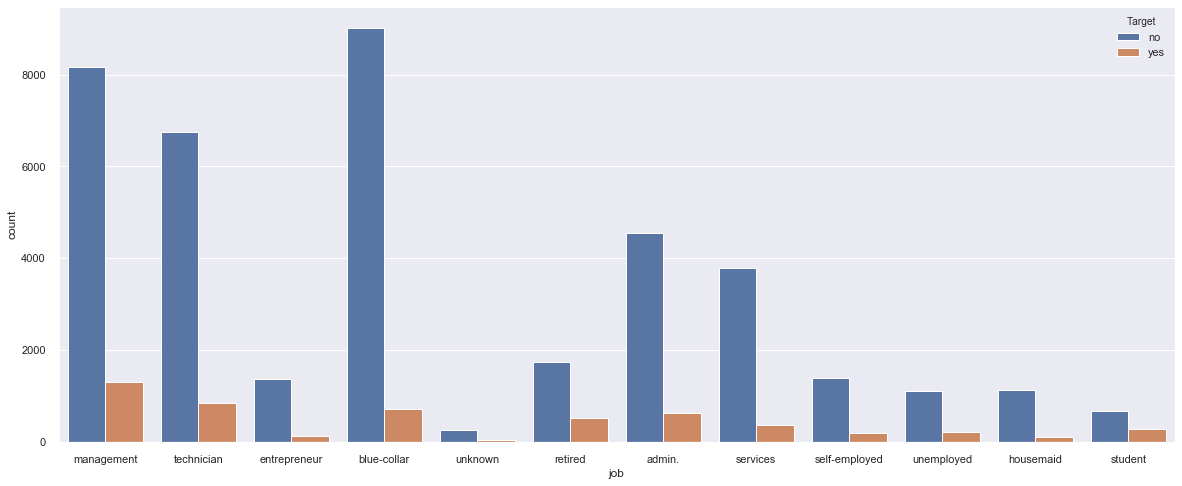

In [38]:
plt.figure(figsize=(20,8))
sns.countplot(bankData['job'], hue=bankData['Target']);

In [39]:
bankData.groupby(['job', 'Target'])['Target'].count()

job            Target
admin.         no        4540
               yes        631
blue-collar    no        9024
               yes        708
entrepreneur   no        1364
               yes        123
housemaid      no        1131
               yes        109
management     no        8157
               yes       1301
retired        no        1748
               yes        516
self-employed  no        1392
               yes        187
services       no        3785
               yes        369
student        no         669
               yes        269
technician     no        6757
               yes        840
unemployed     no        1101
               yes        202
unknown        no         254
               yes         34
Name: Target, dtype: int64

##### INSIGHT: 1. Subscription is higher among 'management', 'technician', 'admin' job role, than 'blue-colar' 
#### 2. Highest comparative subscription rate is with the 'retired' group
#### 3. Blue-colar workers don't show commensurate tendency to subscribe to Term Deposits unlike management workers.

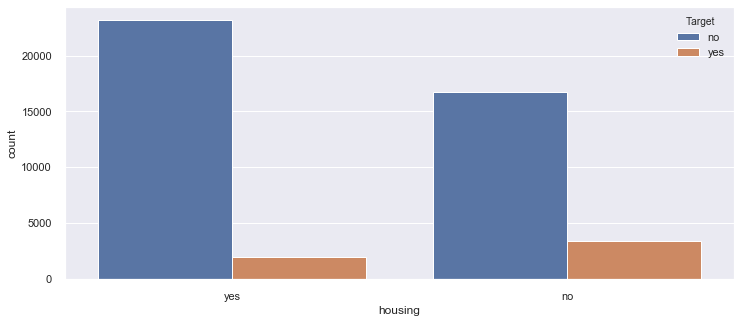

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(bankData['housing'], hue=bankData['Target']);

##### INSIGHT: Term deposit subscription Comparatively higher among customers with No housing loan.

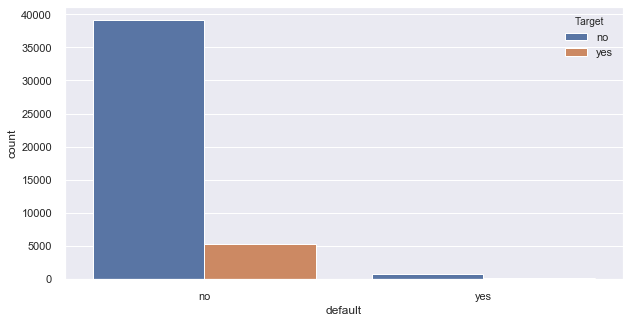

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(bankData['default'], hue=bankData['Target']);

##### INSIGHT: Logical deduction herewith is to not market Term Deposit investment to loan/credit defaulters. As the group is not comparatively likely to subscribe.

In [42]:
bankData.groupby(['default', 'Target'])['Target'].count()

default  Target
no       no        39159
         yes        5237
yes      no          763
         yes          52
Name: Target, dtype: int64

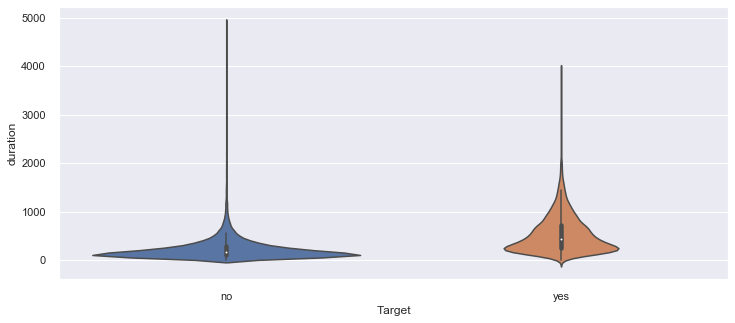

In [43]:
plt.figure(figsize=(12,5))
sns.violinplot(bankData['Target'], bankData['duration']);

##### INSIGHT: Term deposit subscribers have longer campaign duration than non-subscribers - means continuous marketing is effective tool to converting potential Term Depositors.

In [54]:
#Checking For any influence of Seasonality on Target 
target_cross_month = pd.crosstab(bankData['month'], bankData['Target']).apply(lambda x: 100 * x / float(x.sum()))
target_cross_month

Target,no,yes
month,,
apr,5.899003,10.909435
aug,13.924653,13.008130
dec,0.285557,1.890717
feb,5.530785,8.338060
jan,3.158659,2.684818
jul,15.700616,11.854793
jun,12.010921,10.323313
mar,0.573619,4.688977
may,32.165222,17.489128


#### INSIGHT: FEB, MAR, APR and SEP, OCT Showed good conversion to Term Deposits, however MAY is showed least effective more to run Campaign - This will need to be examined further to understand more contributing factors to this result.

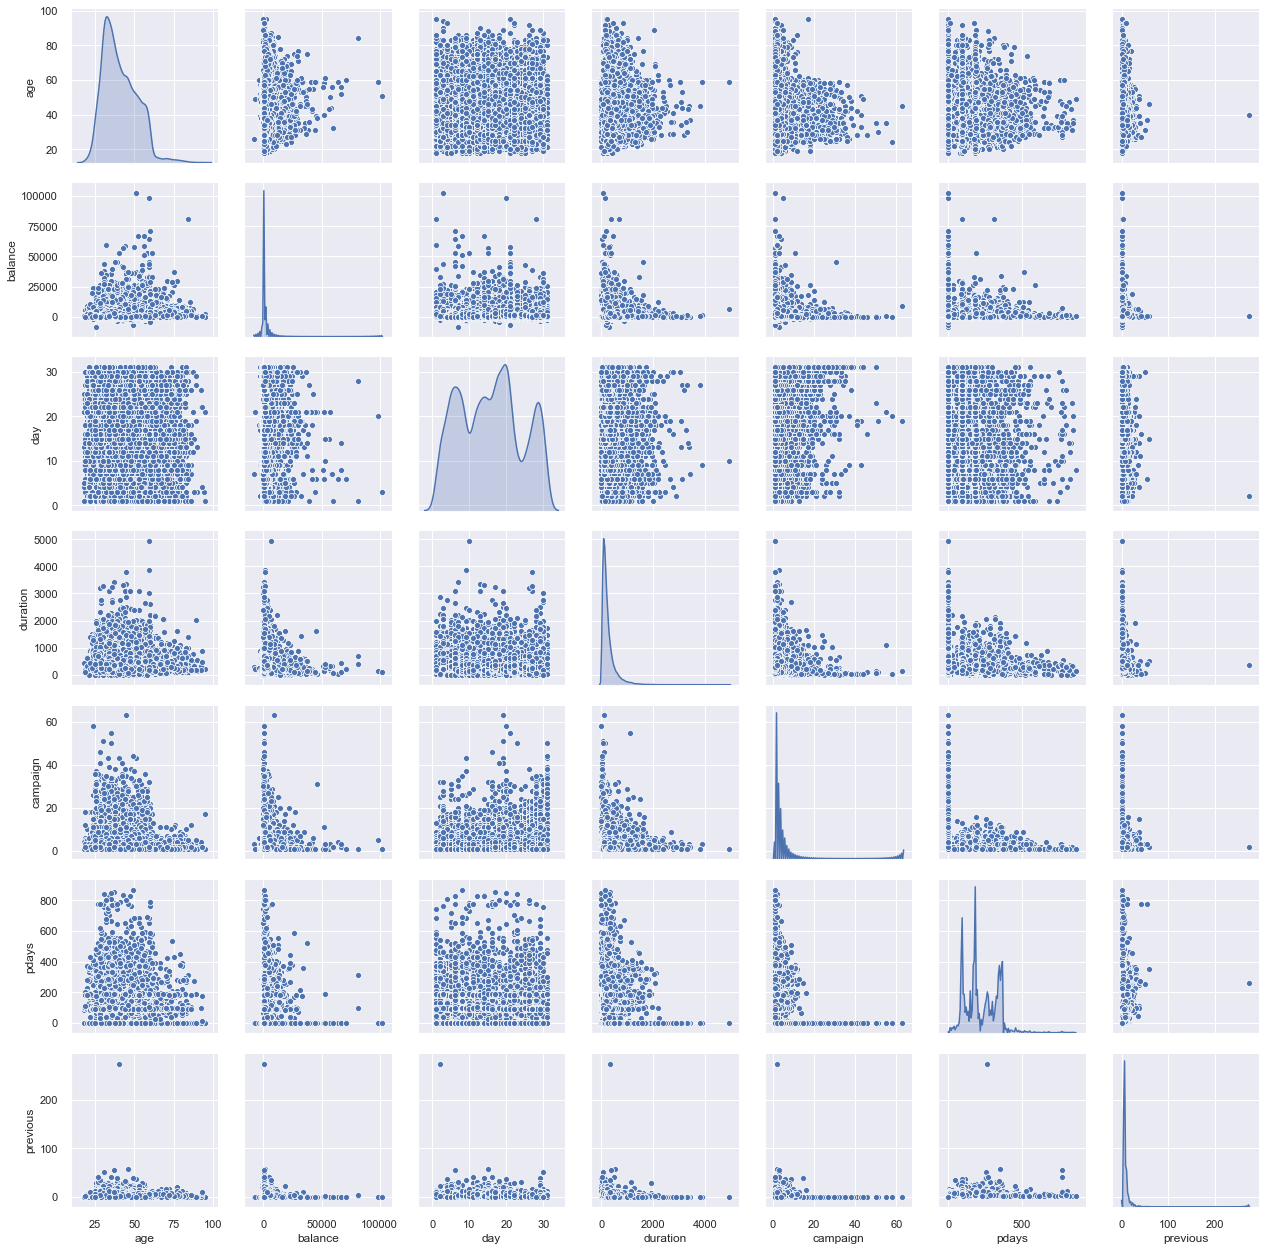

In [44]:
sns.pairplot(bankData,diag_kind='kde');

In [45]:
bankData.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


##### INSIGHT: No strong Correlation - Multicolinearity does not exist between two or more dependent variables. This is necessary to evaluate and Logistic Regression, Decision Tree or Ensemble Models will not be adversely affected by when Multi-collinearity exist - especially as the Coefficient of Correlation is more than 0.5

### Deliverable – 2 (Prepare the data for analytics) – (10)

#### 2.1 Ensure the attribute types are correct. If not, take appropriate actions

#### 2.2 Get the data model ready.

#### 2.3 Transform the data i.e. scale / normalize if required

In [55]:
#I will need to examine situation, where job type is used as a predictor variable - this is from my 
#deduction during the bivariate analysis of the bank dataset

replaceStruct = {
                #"jobs":     {"blue-collar": 1, "management": 2, "technician":3, "admin.":4, "services":5, "retired":6, "self-employed":7, "entrepreneur":8, "unemployed":9, "housemaid":10, "student":11, "unknown":-1 },
                 "contact":     {"cellular": 1, "telephone": 2 ,"unknown": -1},
                "Target":     {"no": 0, "yes": 1 },
                "month":      {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}
                    }
oneHotCols=["education","marital","default", "housing","loan", "poutcome", "job"] #carefully picking attributes which might turn out to be good PREDICTORS for Target variable 

In [56]:
#We replace all our select categoricals with numeric equivalence, to make next phase of analysis easy
#We will choose only categoricals which have should no direct relationship with our Target variable 
#Another variation of this project might require dropping them, however we don't want to completely rule out their 
#relevance- such as time data - seasonality 
bankDataRev = bankData.replace(replaceStruct)
bankDataRev.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,-1,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,-1,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,-1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,secondary,no,1506,yes,no,-1,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,secondary,no,1,no,no,-1,5,5,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,-1,5,5,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,-1,5,5,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,-1,5,5,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,-1,5,5,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,-1,5,5,55,1,-1,0,unknown,0


In [57]:
#We will OneHotEncode - "education","marital","default", "housing","loan", "poutcome", "jobs"
# As they are likely good predictor on the Target variable
bankDataRev = pd.get_dummies(bankDataRev, columns=oneHotCols)

In [58]:
bankDataRev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
age                    45211 non-null int64
balance                45211 non-null int64
contact                45211 non-null int64
day                    45211 non-null int64
month                  45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int64
education_primary      45211 non-null uint8
education_secondary    45211 non-null uint8
education_tertiary     45211 non-null uint8
marital_divorced       45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
default_no             45211 non-null uint8
default_yes            45211 non-null uint8
housing_no             45211 non-null uint8
housing_yes            45211 non-null uint8
loan_no    

#### 2.4 Create the training set and test set in ratio of 70:30

In [59]:
features = [col for col in bankDataRev.columns if col != 'Target']

X_train, X_test, y_train, y_test = train_test_split(bankDataRev[features], bankDataRev['Target'], test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((31647, 37), (13564, 37))

### Deliverable – 3 (create the ensemble model) – (30)

In [60]:
#Since we will be using several models to determine which performs best, lets create a dataFrame for collate and final comparison of our results from each model

def resultsDFFn(ml_model_type, ml_type_accuracy, ml_params):
    resultsDF = pd.DataFrame({'Method': [ml_model_type], 'Accuracy': ml_type_accuracy, 'Parameter': ml_params})
    resultsDF = resultsDf[['Method', 'Accuracy', 'Parameter']]
    return resultsDF

In [61]:
def resultsDFConc(_df1, _df2):
    resultsDf = pd.concat([_df1, _df2])
    return resultsDf

In [62]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,2] , cmap='Greens')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [63]:
def logModelScores(model1, X1_test, y1_test, X1_train, y1_train):
    test_model_score = model1.score(X1_test, y1_test)
    train_model_score = model1.score(X1_train, y1_train)
    print("Model score on Training data is", train_model_score)
    print("Model score on Test data is", test_model_score)
    return train_model_score, test_model_score

In [64]:
#WE need to create a dataFrame to handle collation of model performance parameters

def getModelPerformanceParams(_model_type, _model_params, _model, _prediction):
    
    trainDataScore = _model.score(X_train,y_train)
    testDataScore = _model.score(X_test, y_test)
    recall = recall_score(y_test,_prediction)
    precision = precision_score(y_test,_prediction)
    f1score = f1_score(y_test,_prediction)
    rocAucScore = roc_auc_score(y_test,_prediction)
    
    print("Training accuracy: ",trainDataScore)  
    print()
    print("Testing accuracy: ",testDataScore)
    print()
    print('Confusion Matrix')
    cm = metrics.confusion_matrix(y_test, _prediction, labels=[1, 0])
    print(cm.transpose())
    print(draw_cm(y_test,_prediction))
    print()
    print("Recall: ",recall)
    print()
    print("Precision: ", precision)
    print()
    print("F1 Score: ",f1score)
    print()
    print("ROC_AUC Score: ",rocAucScore)

In [65]:
def getPerfParams(_model, _prediction):
    
    #trainDataScore = _model.score(X_train,y_train)
    #testDataScore = _model.score(X_test, y_test)
    recall = recall_score(y_test,_prediction)
    precision = precision_score(y_test,_prediction)
    f1score = f1_score(y_test,_prediction)
    rocAucScore = roc_auc_score(y_test,_prediction)
    return recall, precision, f1score, rocAucScore

In [66]:
def getFinalPerfParams(_model, _prediction):
    
    trainDataScore = _model.score(X_train,y_train)
    testDataScore = _model.score(X_test, y_test)
    recall = recall_score(y_test,_prediction)
    precision = precision_score(y_test,_prediction)
    f1score = f1_score(y_test,_prediction)
    rocAucScore = roc_auc_score(y_test,_prediction)
    return trainDataScore, testDataScore, recall, precision, f1score, rocAucScore

In [67]:
# Creating a function for visualizing classifier results
def visualClassifierReport(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

#### 3.1 First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

In [68]:
ml_model_type = 'Logistic Regression'

#In this section, we will attempt using Logistic Regression and Decision Tree for purpose of prediction
logModel = LogisticRegression(solver="liblinear") #Default Penalty is l2
lg = logModel.fit(X_train, y_train)
model_type_param = 'liblinear-penalty=l2'

#predict on test
y_predict = logModel.predict(X_test)

In [69]:
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
#lg.summary2()

Optimization terminated successfully.
         Current function value: 0.249684
         Iterations 16


In [70]:
#Fetch model scores on Training and Test data
train_score, test_score = logModelScores(logModel, X_test, y_test, X_train, y_train)

Model score on Training data is 0.9008120832938351
Model score on Test data is 0.8987761722205839


In [71]:
recall, precision, f1score, rocAucscore = getPerfParams(logModel, y_predict)

resultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = resultsDf[['Method', 'Parameter', 'Training score', 'Accuracy', 'Recall', 'Precision','F1_Score', 'ROC_AUC Score' ]]
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377


In [72]:
#Optimizing the Logistic Regression model with different penalty to examine any improvement in result
logModel2 = LogisticRegression(solver="liblinear", penalty='l1') #Default Penalty is l2
lg2 = logModel2.fit(X_train, y_train)
model_type_param = 'liblinear-penalty=l1'

#predict on test - Accuracy
y_predict2 = logModel2.predict(X_test)

In [73]:
logit2 = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.249684
         Iterations 16


In [74]:
train_score, test_score = logModelScores(logModel2, X_test, y_test, X_train, y_train)

Model score on Training data is 0.9006540904351124
Model score on Test data is 0.898849896785609


In [75]:
recall, precision, f1score, rocAucscore = getPerfParams(logModel2, y_predict2)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961


#### INSIGHT: Logistic Regression using liblinear with penalty score of l1 gave better prediction - our recall as well as F1 Score, Accuracy improved

In [76]:
trainDataScore,testDataScore,recall, precision, f1score, rocAucScore  = getFinalPerfParams(logModel2, y_predict2)

finalResultsDF = pd.DataFrame({'Method':[ml_model_type], 'Parameter':  model_type_param, 'Training score': trainDataScore, 'Accuracy': testDataScore, 'Recall': recall, 'Precision': precision, "F1_Score":f1score, "ROC_AUC Score":rocAucScore})
finalResultsDF = finalResultsDF[['Method', 'Parameter', 'Training score', 'Accuracy', 'Recall', 'Precision','F1_Score', 'ROC_AUC Score' ]]

In [77]:
#We will aggregate the best classifier in each Classification Method into a final dataFrame - finalResultsDF - for easy 
#Comparison and conclusion at the end of this task
finalResultsDF

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.89885,0.326658,0.638142,0.432119,0.650961


In [78]:
#Here we build Decision tree starting with gini, then entropy as criterion
# Regularization is going to be applied outrightly to avoid overfitted results - since we know overfitting is an
#expected constraint with Decision Tree not pruned.
ml_model_type = 'Decision Tree'

dTree_model = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1)
dTree_model.fit(X_train, y_train)

model_type_param = 'gini'+' max_depth=5'

train_score = dTree_model.score(X_train, y_train)
test_score = dTree_model.score(X_test, y_test)

y_predTree = dTree_model.predict(X_test)
#model_accuracy = accuracy_score(y_test,y_predTree )

print(train_score)
print(test_score)

0.9063418333491327
0.8992185196107343


In [79]:
recall, precision, f1score, rocAucscore = getPerfParams(dTree_model, y_predTree)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152


In [80]:
#we like to know if using entropy will give better results
dTree_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state=1)
dTree_model2.fit(X_train, y_train)

model_type_param2 = 'entropy'+' max_depth=5'

train_score = dTree_model2.score(X_train, y_train)
test_score = dTree_model2.score(X_test, y_test)

y_predTree2 = dTree_model2.predict(X_test)

print(train_score)
print(test_score)

0.9041299333270136
0.8971542317900324


In [81]:
recall, precision, f1score, rocAucscore = getPerfParams(dTree_model2, y_predTree2)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param2, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035


INSIGHT: Decision tree using gini as Criterion at max_depth of 5, regularized to avoid overfitting - gave better result on training and test data.  We can thus check the feature importance based on this. 

In [82]:
# Importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree_model.feature_importances_, columns = ["Feature Importance"], index = X_train.columns).sort_values(by='Feature Importance', ascending=False))

                     Feature Importance
duration                       0.559969
poutcome_success               0.299579
age                            0.052857
pdays                          0.042480
contact                        0.019376
month                          0.016646
balance                        0.002379
housing_no                     0.002223
marital_married                0.002134
day                            0.001590
job_admin.                     0.000766
job_housemaid                  0.000000
job_blue-collar                0.000000
job_entrepreneur               0.000000
job_self-employed              0.000000
job_management                 0.000000
job_retired                    0.000000
job_services                   0.000000
job_student                    0.000000
job_technician                 0.000000
job_unemployed                 0.000000
poutcome_unknown               0.000000
housing_yes                    0.000000
poutcome_other                 0.000000


Training accuracy:  0.9063418333491327

Testing accuracy:  0.8992185196107343

Confusion Matrix
[[  533   302]
 [ 1065 11664]]


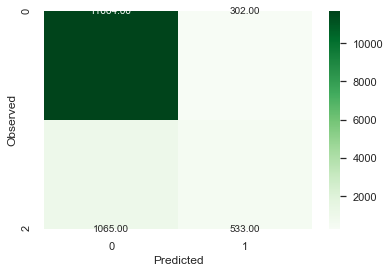

None

Recall:  0.3335419274092616

Precision:  0.6383233532934132

F1 Score:  0.43814221126181674

ROC_AUC Score:  0.6541518762902903


In [83]:
#For Decision Tree with best result - that is, gini - criterion, get parameters for the model's performance parameters
getModelPerformanceParams(ml_model_type, model_type_param, dTree_model, y_predTree)

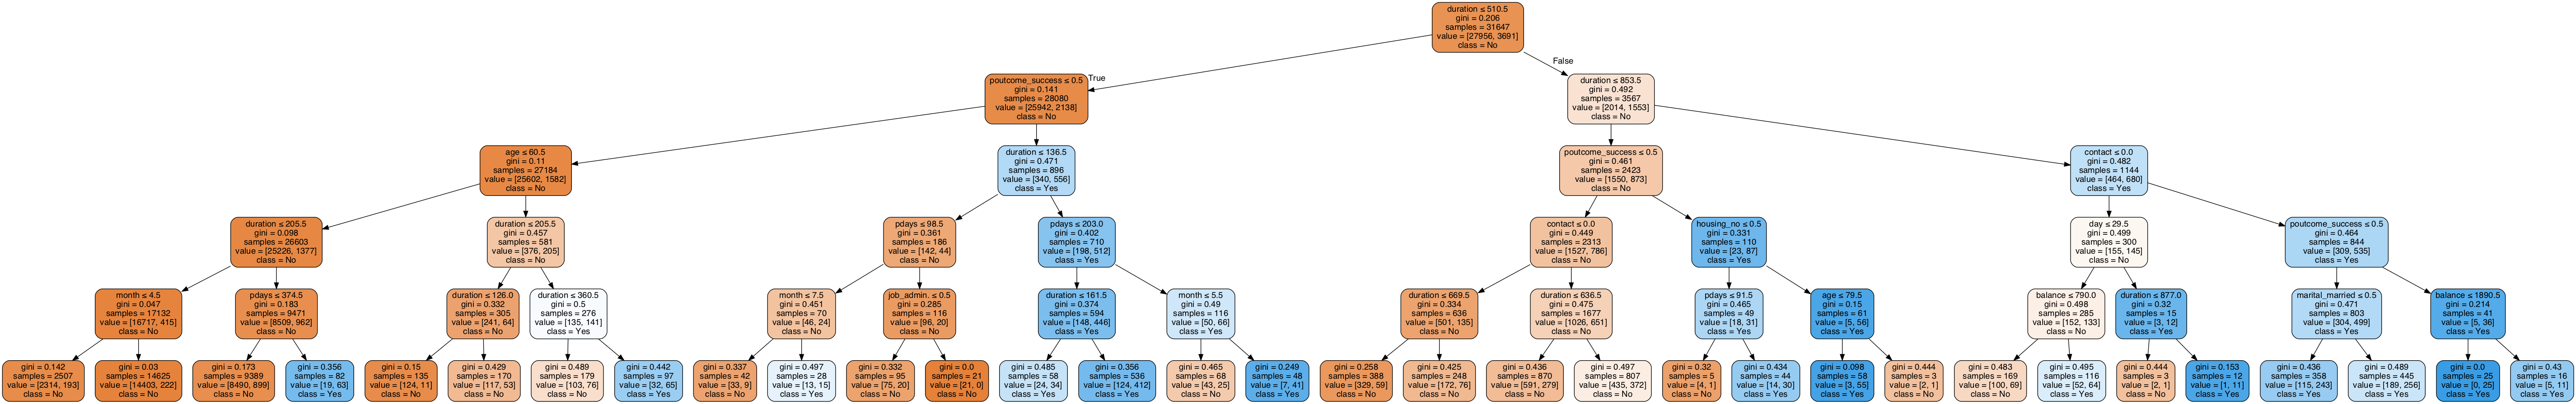

In [84]:
#Visualizing the Best Decision Tree - To see if any insight can be drawn
dot_data = StringIO()
export_graphviz(dTree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('target_DT_pruned3.png')
Image(graph.create_png())

In [85]:
#Putting the best Decision Tree criterion in this Classifier type into our final Results Table 
trainDataScore,testDataScore,recall, precision, f1score, rocAucScore  = getFinalPerfParams(dTree_model, y_predTree)

tempfinalResultsDF = pd.DataFrame({'Method':[ml_model_type], 'Parameter':  model_type_param, 'Training score': trainDataScore, 'Accuracy': testDataScore, 'Recall': recall, 'Precision': precision, "F1_Score":f1score, "ROC_AUC Score":rocAucScore})
finalResultsDF = pd.concat([finalResultsDF, tempfinalResultsDF])
finalResultsDF

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152


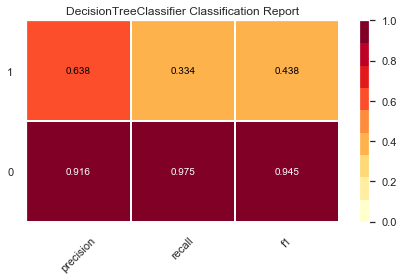

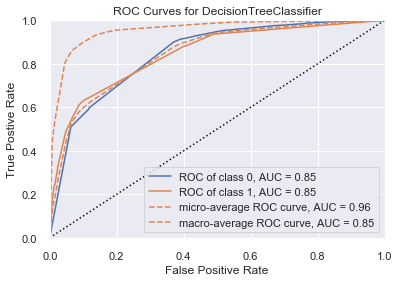

In [86]:
#Fetching visuall Classification Report For our best decision Tree -

visualClassifierReport(DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1))

#### 3.2 Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

In [87]:
#Bagging and Boosting - here we will use different params for Bagging, AdaBoost, GradientBoost and RandomForest
#We start with - 
#1. Bagging Classifier - estimator 10, 30, 50
#2. RandomForest - estimator 10, 30, 50
#3. AdaBoost - estimator 10, 30, 50
#4. GradientBoost - estimator 10, 30, 50

In [88]:
ml_model_type = 'Bagging Classifier'
bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)

model_type_param = 'estimators=10'

train_score = bgcl.score(X_train, y_train)
test_score = bgcl.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_BG1 = bgcl.predict(X_test)

acc_BG = accuracy_score(y_test, prediction_BG1)
print('Model Accuracy: ', acc_BG)

Training data score:  0.9801560969444181
Testing data score:  0.8981126511353583
Model Accuracy:  0.8981126511353583


In [89]:
recall, precision, f1score, rocAucscore = getPerfParams(bgcl, prediction_BG1)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702


In [90]:
#Checking if there will be improvement when n_estimator is increased
bgc2 = BaggingClassifier(n_estimators=30, max_samples= .7, bootstrap=True)
bgc2 = bgc2.fit(X_train, y_train)

model_type_param = 'estimators=30'

train_score = bgc2.score(X_train, y_train)
test_score = bgc2.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_BG2 = bgc2.predict(X_test)

acc_BG = accuracy_score(y_test, prediction_BG2)
print('Model Accuracy: ', acc_BG)

Training data score:  0.9918475684899043
Testing data score:  0.9020937776467118
Model Accuracy:  0.9020937776467118


In [91]:
recall, precision, f1score, rocAucscore = getPerfParams(bgc2, prediction_BG2)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702
0,Bagging Classifier,estimators=30,0.991848,0.902094,0.444305,0.617391,0.516739,0.703767


In [92]:
#Checking if there will be improvement when n_estimator is increased
bgc3 = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True)
bgc3 = bgc3.fit(X_train, y_train)

model_type_param = 'estimators=50'

train_score = bgc3.score(X_train, y_train)
test_score = bgc3.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_BG3 = bgc3.predict(X_test)

acc_BG = accuracy_score(y_test, prediction_BG3)
print('Model Accuracy: ', acc_BG)

Training data score:  0.9930799127879419
Testing data score:  0.9012090828664111
Model Accuracy:  0.9012090828664111


In [93]:
recall, precision, f1score, rocAucscore = getPerfParams(bgc3, prediction_BG3)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702
0,Bagging Classifier,estimators=30,0.991848,0.902094,0.444305,0.617391,0.516739,0.703767
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519


INSIGHT: Bagging Classifier with 50 estimator gave better accuracy than lower 10 and 30. Also, improvement in Recall and F1 Score, which are parameters of utmost interest.
Also, increasing the number of estimators to 100 or more, might work in improving the Recall and F1 score. In production, I will continue to increase the number of estimators for Bagging Classifier until diminishing return sets in either for Recall or F1 Score.
So far, better result than all other previously used Classifiers.

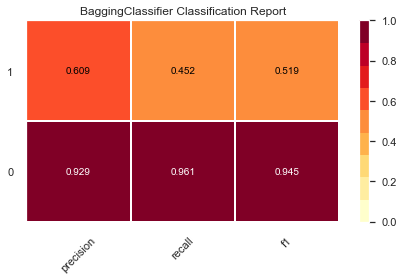

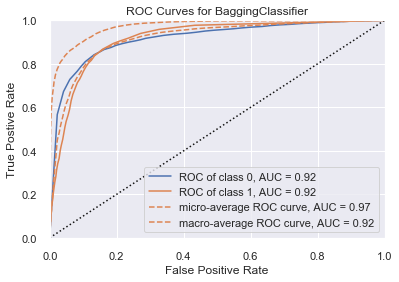

In [94]:
#Fetching visuall Classification Report For our best Bagging Classifier -

visualClassifierReport(bgc3)

Training accuracy:  0.9930799127879419

Testing accuracy:  0.9012090828664111

Confusion Matrix
[[  722   464]
 [  876 11502]]


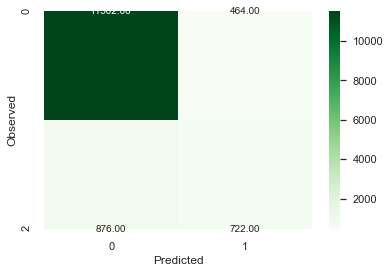

None

Recall:  0.4518147684605757

Precision:  0.6087689713322091

F1 Score:  0.5186781609195402

ROC_AUC Score:  0.7065191174744798


In [95]:
#fetch performance metrics
getModelPerformanceParams(ml_model_type, model_type_param,bgc3, prediction_BG3)

In [96]:
#Putting the best Bagging Classifier with n_estimator=50 in this Classifier type into our final Results Table 
trainDataScore,testDataScore,recall, precision, f1score, rocAucScore  = getFinalPerfParams(bgc3, prediction_BG3)

tempfinalResultsDF = pd.DataFrame({'Method':[ml_model_type], 'Parameter':  model_type_param, 'Training score': trainDataScore, 'Accuracy': testDataScore, 'Recall': recall, 'Precision': precision, "F1_Score":f1score, "ROC_AUC Score":rocAucScore})
finalResultsDF = pd.concat([finalResultsDF, tempfinalResultsDF])
finalResultsDF

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519


In [97]:
#2. RandomForest - estimator 10, 30, 50
#Step 1 - RandomForest Classifier, using 10 estimators
ml_model_type = 'RandomForest Classifier'

rfcl = RandomForestClassifier(n_estimators = 10)
rfcl = rfcl.fit(X_train, y_train)

model_type_param = 'estimators=10'

train_score = rfcl.score(X_train, y_train)
test_score = rfcl.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_RF1 = rfcl.predict(X_test)

acc_RF = accuracy_score(y_test, prediction_RF1)
print('Model Accuracy: ', acc_RF)

Training data score:  0.9922899484943281
Testing data score:  0.8970067826599823
Model Accuracy:  0.8970067826599823


In [98]:
recall, precision, f1score, rocAucscore = getPerfParams(rfcl, prediction_RF1)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702
0,Bagging Classifier,estimators=30,0.991848,0.902094,0.444305,0.617391,0.516739,0.703767
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=10,0.992290,0.897007,0.346683,0.610805,0.442315,0.658592


In [99]:
#Step 2 - RandomForest Classifier, using 30 estimators
rfc2 = RandomForestClassifier(n_estimators = 30)
rfc2 = rfc2.fit(X_train, y_train)

model_type_param = 'estimators=30'

train_score = rfc2.score(X_train, y_train)
test_score = rfc2.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_RF2 = rfc2.predict(X_test)

acc_RF = accuracy_score(y_test, prediction_RF2)
print('Model Accuracy: ', acc_RF)

Training data score:  0.9989888457041741
Testing data score:  0.9037157180772634
Model Accuracy:  0.9037157180772634


In [100]:
recall, precision, f1score, rocAucscore = getPerfParams(rfc2, prediction_RF2)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702
0,Bagging Classifier,estimators=30,0.991848,0.902094,0.444305,0.617391,0.516739,0.703767
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=10,0.992290,0.897007,0.346683,0.610805,0.442315,0.658592
0,RandomForest Classifier,estimators=30,0.998989,0.903716,0.387359,0.654334,0.486635,0.680016


In [101]:
#Step 3 - RandomForest Classifier, using 50 estimators
rfc3 = RandomForestClassifier(n_estimators = 50)
rfc3 = rfc3.fit(X_train, y_train)

model_type_param = 'estimators=50'

train_score = rfc3.score(X_train, y_train)
test_score = rfc3.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_RF3 = rfc3.predict(X_test)

acc_RF = accuracy_score(y_test, prediction_RF3)
print('Model Accuracy: ', acc_RF)

Training data score:  0.9997788099977881
Testing data score:  0.902241226776762
Model Accuracy:  0.902241226776762


In [102]:
recall, precision, f1score, rocAucscore = getPerfParams(rfc3, prediction_RF3)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702
0,Bagging Classifier,estimators=30,0.991848,0.902094,0.444305,0.617391,0.516739,0.703767
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=10,0.992290,0.897007,0.346683,0.610805,0.442315,0.658592
0,RandomForest Classifier,estimators=30,0.998989,0.903716,0.387359,0.654334,0.486635,0.680016
0,RandomForest Classifier,estimators=50,0.999779,0.902241,0.375469,0.646552,0.475059,0.674029


INSIGHT: Accuracy, Recall, Precision of RandomForest Classifier improved with the increase in number of estimators. However, it was not as good as the Bagging Classifier with same number of estimators in improving Recall and F1 Score as well as the ROC AUC Score.
The RandomForest model used above, can be improved when the number of estimators is increased.

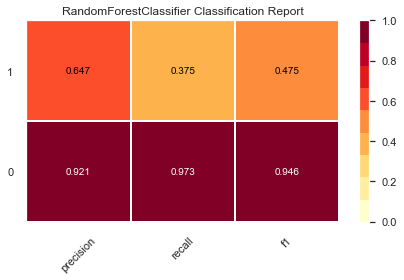

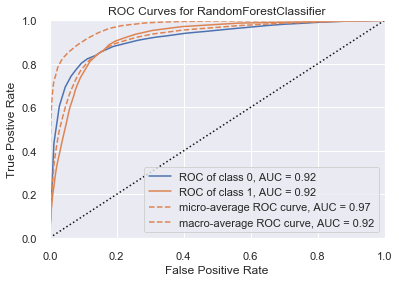

In [103]:
#Fetching visuall Classification Report For our best RandomForest Classifier -
visualClassifierReport(rfc3)

Training accuracy:  0.9997788099977881

Testing accuracy:  0.902241226776762

Confusion Matrix
[[  600   328]
 [  998 11638]]


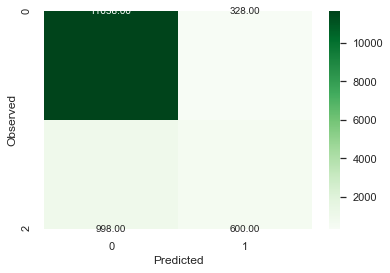

None

Recall:  0.37546933667083854

Precision:  0.646551724137931

F1 Score:  0.4750593824228028

ROC_AUC Score:  0.6740291694218308


In [104]:
#fetch performance metrics
getModelPerformanceParams(ml_model_type, model_type_param,rfc3, prediction_RF3)

In [105]:
#Putting the best RandomForest Classifier with n_estimator=50 into the final Results Table 
trainDataScore,testDataScore,recall, precision, f1score, rocAucScore  = getFinalPerfParams(rfc3, prediction_RF3)

tempfinalResultsDF = pd.DataFrame({'Method':[ml_model_type], 'Parameter':  model_type_param, 'Training score': trainDataScore, 'Accuracy': testDataScore, 'Recall': recall, 'Precision': precision, "F1_Score":f1score, "ROC_AUC Score":rocAucScore})
finalResultsDF = pd.concat([finalResultsDF, tempfinalResultsDF])
finalResultsDF

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=50,0.999779,0.902241,0.375469,0.646552,0.475059,0.674029


In [106]:
#3. AdaBoost - estimator 10, 30, 50
#Step 1 - AdaBoost Classifier, using 10 estimators
ml_model_type = 'AdaBoost Classifier'

abcl = AdaBoostClassifier(n_estimators = 10, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

model_type_param = 'estimators=10'

train_score = abcl.score(X_train, y_train)
test_score = abcl.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_ABC1 = abcl.predict(X_test)

acc_ABC = accuracy_score(y_test, prediction_ABC1)
print('Model Accuracy: ', acc_ABC)

Training data score:  0.8854235788542358
Testing data score:  0.8845473311707461
Model Accuracy:  0.8845473311707461


In [107]:
recall, precision, f1score, rocAucscore = getPerfParams(abcl, prediction_ABC1)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702
0,Bagging Classifier,estimators=30,0.991848,0.902094,0.444305,0.617391,0.516739,0.703767
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=10,0.992290,0.897007,0.346683,0.610805,0.442315,0.658592
0,RandomForest Classifier,estimators=30,0.998989,0.903716,0.387359,0.654334,0.486635,0.680016
0,RandomForest Classifier,estimators=50,0.999779,0.902241,0.375469,0.646552,0.475059,0.674029


INSIGHT: Recall, Precision, F1 Score and ROC_AUC Score showed poor results - we will need to examine this phenomenon further, with increase in number of estimators - however, if this trend continue - it might just show certain limitation of AdaBoost Classifier.

In [108]:
#Step 2 - AdaBoost Classifier, using 30 estimators
abc2 = AdaBoostClassifier(n_estimators = 30, learning_rate=0.1, random_state=22)
abc2 = abc2.fit(X_train, y_train)

model_type_param = 'estimators=30'

train_score = abc2.score(X_train, y_train)
test_score = abc2.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_ABC2 = abc2.predict(X_test)

acc_ABC = accuracy_score(y_test, prediction_ABC2)
print('Model Accuracy: ', acc_ABC)

Training data score:  0.8866559231522735
Testing data score:  0.8856531996461221
Model Accuracy:  0.8856531996461221


In [109]:
recall, precision, f1score, rocAucscore = getPerfParams(abc2, prediction_ABC2)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702
0,Bagging Classifier,estimators=30,0.991848,0.902094,0.444305,0.617391,0.516739,0.703767
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=10,0.992290,0.897007,0.346683,0.610805,0.442315,0.658592
0,RandomForest Classifier,estimators=30,0.998989,0.903716,0.387359,0.654334,0.486635,0.680016
0,RandomForest Classifier,estimators=50,0.999779,0.902241,0.375469,0.646552,0.475059,0.674029


INSIGHT: Precision picked up very well with increase in number of estimators in AdaBoost, however not so commendable improvement in Recall and F1 Score. ROC_AUC Score showed modest improvement which not significant beyond just pure guess at 0.5
We will examine further with increase in number of estimators for AdaBoost Classifier.

In [110]:
#Step 3 - AdaBoost Classifier, using 50 estimators
abc3 = AdaBoostClassifier(n_estimators = 50, learning_rate=0.1, random_state=22)
abc3 = abc3.fit(X_train, y_train)

model_type_param = 'estimators=50'

train_score = abc3.score(X_train, y_train)
test_score = abc3.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_ABC3 = abc3.predict(X_test)

acc_ABC = accuracy_score(y_test, prediction_ABC3)
print('Model Accuracy: ', acc_ABC)

Training data score:  0.8897841817549846
Testing data score:  0.8883072839870245
Model Accuracy:  0.8883072839870245


In [111]:
recall, precision, f1score, rocAucscore = getPerfParams(abc3, prediction_ABC3)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702
0,Bagging Classifier,estimators=30,0.991848,0.902094,0.444305,0.617391,0.516739,0.703767
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=10,0.992290,0.897007,0.346683,0.610805,0.442315,0.658592
0,RandomForest Classifier,estimators=30,0.998989,0.903716,0.387359,0.654334,0.486635,0.680016
0,RandomForest Classifier,estimators=50,0.999779,0.902241,0.375469,0.646552,0.475059,0.674029


INSIGHT: AdaBoost Classifier with 50 estimators showed improvement in Accuracy, Recall, and F1 Score. Precision however dropped. ROC_AUC also showed improvement. Generally, AdaBoost with equal number of estimators is Third behind Bagging Classifier and RandomForest Classifier.

Possibility exist of marginal improvement in Accuracy, Recall, F1_Score and ROC_AUC Score, however, Precision will continue to drop which is different from other Bagging and Boosting Classifiers used so far in our analysis.

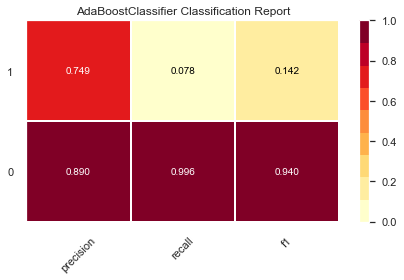

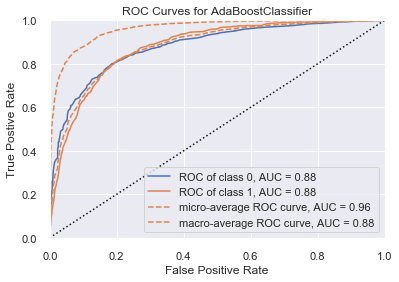

In [112]:
#Fetching visuall Classification Report For our best AdaBoost Classifier -
visualClassifierReport(abc3)

Training accuracy:  0.8897841817549846

Testing accuracy:  0.8883072839870245

Confusion Matrix
[[  125    42]
 [ 1473 11924]]


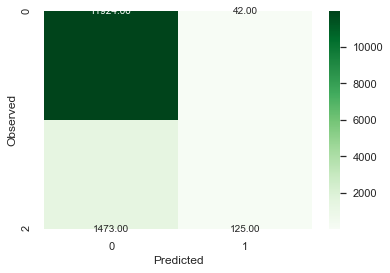

None

Recall:  0.07822277847309136

Precision:  0.7485029940119761

F1 Score:  0.141643059490085

ROC_AUC Score:  0.5373564168146837


In [113]:
#fetch performance metrics
getModelPerformanceParams(ml_model_type, model_type_param,abc3, prediction_ABC3)

In [114]:
#Putting the best AdaBoost Classifier with n_estimator=50 into the final Results Table 
trainDataScore,testDataScore,recall, precision, f1score, rocAucScore  = getFinalPerfParams(abc3, prediction_ABC3)

tempfinalResultsDF = pd.DataFrame({'Method':[ml_model_type], 'Parameter':  model_type_param, 'Training score': trainDataScore, 'Accuracy': testDataScore, 'Recall': recall, 'Precision': precision, "F1_Score":f1score, "ROC_AUC Score":rocAucScore})
finalResultsDF = pd.concat([finalResultsDF, tempfinalResultsDF])
finalResultsDF

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=50,0.999779,0.902241,0.375469,0.646552,0.475059,0.674029
0,AdaBoost Classifier,estimators=50,0.889784,0.888307,0.078223,0.748503,0.141643,0.537356


##### INSIGHT: Recall is very low for AdaBoost Classifier - which subsequently affected the F1 Score. These are two most important parameters in our analysis. AdaBoost Classifier has not shown comparable good results with similar number of estimators unlike Bagging and RandomForest Classifiers used on the bank customers dataset.

##### Performance is also not as good as Logistic Regression or Decision Tree, which are simpler ML Classifier Models.

In [115]:
#4. GradientBoost - estimator 10, 30, 50
#Step 1 - GradientBoost Classifier, using 10 estimators
ml_model_type = 'GradientBoost Classifier'

gbcl = GradientBoostingClassifier(n_estimators = 10, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

model_type_param = 'estimators=10'

train_score = gbcl.score(X_train, y_train)
test_score = gbcl.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_GBC1 = gbcl.predict(X_test)

acc_GBC = accuracy_score(y_test, prediction_GBC1)
print('Model Accuracy: ', acc_GBC)

Training data score:  0.8944923689449237
Testing data score:  0.8942789737540549
Model Accuracy:  0.8942789737540549


In [116]:
recall, precision, f1score, rocAucscore = getPerfParams(gbcl, prediction_GBC1)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702
0,Bagging Classifier,estimators=30,0.991848,0.902094,0.444305,0.617391,0.516739,0.703767
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=10,0.992290,0.897007,0.346683,0.610805,0.442315,0.658592
0,RandomForest Classifier,estimators=30,0.998989,0.903716,0.387359,0.654334,0.486635,0.680016
0,RandomForest Classifier,estimators=50,0.999779,0.902241,0.375469,0.646552,0.475059,0.674029


In [117]:
#Step 2 - GradientBoost Classifier, using 30 estimators

gbc2 = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1, random_state=22)
gbc2 = gbc2.fit(X_train, y_train)

model_type_param = 'estimators=30'

train_score = gbc2.score(X_train, y_train)
test_score = gbc2.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_GBC2 = gbc2.predict(X_test)

acc_GBC = accuracy_score(y_test, prediction_GBC2)
print('Model Accuracy: ', acc_GBC)

Training data score:  0.9044459190444591
Testing data score:  0.8998083161309348
Model Accuracy:  0.8998083161309348


In [118]:
recall, precision, f1score, rocAucscore = getPerfParams(gbc2, prediction_GBC2)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702
0,Bagging Classifier,estimators=30,0.991848,0.902094,0.444305,0.617391,0.516739,0.703767
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=10,0.992290,0.897007,0.346683,0.610805,0.442315,0.658592
0,RandomForest Classifier,estimators=30,0.998989,0.903716,0.387359,0.654334,0.486635,0.680016
0,RandomForest Classifier,estimators=50,0.999779,0.902241,0.375469,0.646552,0.475059,0.674029


In [119]:
#Step 3 - GradientBoost Classifier, using 50 estimators

gbc3 = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbc3 = gbc3.fit(X_train, y_train)

model_type_param = 'estimators=50'

train_score = gbc3.score(X_train, y_train)
test_score = gbc3.score(X_test, y_test)

print('Training data score: ', train_score)
print('Testing data score: ', test_score)

prediction_GBC3 = gbc3.predict(X_test)

acc_GBC = accuracy_score(y_test, prediction_GBC3)
print('Model Accuracy: ', acc_GBC)

Training data score:  0.906310234777388
Testing data score:  0.90002948982601
Model Accuracy:  0.90002948982601


In [120]:
recall, precision, f1score, rocAucscore = getPerfParams(gbc3, prediction_GBC3)

tempResultsDf = pd.DataFrame({'Method': [ml_model_type], 'Parameter':model_type_param, 'Training score': train_score, 'Accuracy': test_score, 'Recall':recall, 'Precision':precision, 'F1_Score':f1score, 'ROC_AUC Score':rocAucscore})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l2,0.900812,0.898776,0.325407,0.638037,0.430999,0.650377
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Decision Tree,entropy max_depth=5,0.904130,0.897154,0.312891,0.627353,0.417537,0.644035
0,Bagging Classifier,estimators=10,0.980156,0.898113,0.405507,0.600000,0.483943,0.684702
0,Bagging Classifier,estimators=30,0.991848,0.902094,0.444305,0.617391,0.516739,0.703767
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=10,0.992290,0.897007,0.346683,0.610805,0.442315,0.658592
0,RandomForest Classifier,estimators=30,0.998989,0.903716,0.387359,0.654334,0.486635,0.680016
0,RandomForest Classifier,estimators=50,0.999779,0.902241,0.375469,0.646552,0.475059,0.674029


##### INSIGHT: GradientBoost Classifier showed better result improvement for Accuracy, Recall, F1 Score and ROC_AUC score with increase in the numbers of estimators. However, it rank behind Bagging Classifier and RandomForest Classifiers on all desireable metrics - Recall and F1 Score and ROC_AUC Score.

##### However, GradientBoost Classifier gave better results than Logistic Regression and Decision Tree Classifiers.

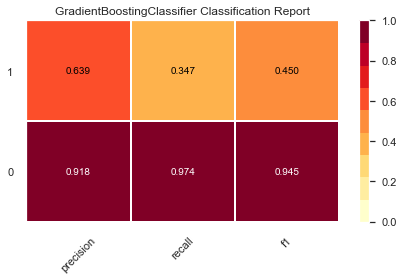

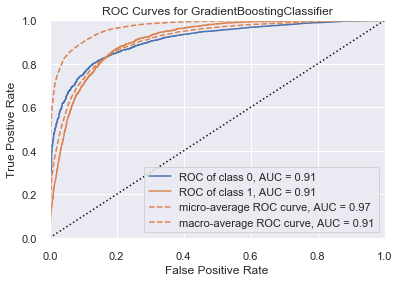

In [121]:
#Fetching visuall Classification Report For our best GradientBoost Classifier -
visualClassifierReport(gbc3)

Training accuracy:  0.906310234777388

Testing accuracy:  0.90002948982601

Confusion Matrix
[[  555   313]
 [ 1043 11653]]


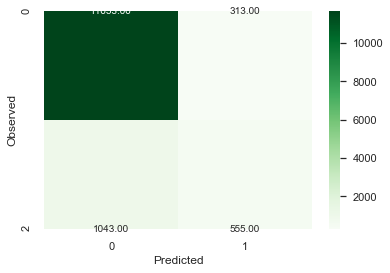

None

Recall:  0.34730913642052563

Precision:  0.6394009216589862

F1 Score:  0.45012165450121655

ROC_AUC Score:  0.660575845161625


In [122]:
#fetch performance metrics
getModelPerformanceParams(ml_model_type, model_type_param,gbc3, prediction_GBC3)

In [123]:
#Putting the best AdaBoost Classifier with n_estimator=50 into the final Results Table 
trainDataScore,testDataScore,recall, precision, f1score, rocAucScore  = getFinalPerfParams(gbc3, prediction_GBC3)

tempfinalResultsDF = pd.DataFrame({'Method':[ml_model_type], 'Parameter':  model_type_param, 'Training score': trainDataScore, 'Accuracy': testDataScore, 'Recall': recall, 'Precision': precision, "F1_Score":f1score, "ROC_AUC Score":rocAucScore})
finalResultsDF = pd.concat([finalResultsDF, tempfinalResultsDF])
finalResultsDF

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
0,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
0,RandomForest Classifier,estimators=50,0.999779,0.902241,0.375469,0.646552,0.475059,0.674029
0,AdaBoost Classifier,estimators=50,0.889784,0.888307,0.078223,0.748503,0.141643,0.537356
0,GradientBoost Classifier,estimators=50,0.906310,0.900029,0.347309,0.639401,0.450122,0.660576


#### 3.3 Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

In [128]:
#Sorting the Final Ensemble Learning Algorithms for the Term Deposit prediciton Final Result DataFrame Based on ROC_AUC Score, Recall, F1_Score 
finalResultsDF.sort_values(by='ROC_AUC Score', ascending=False).reset_index(drop=True)

,Method,Parameter,Training score,Accuracy,Recall,Precision,F1_Score,ROC_AUC Score
0,Bagging Classifier,estimators=50,0.993080,0.901209,0.451815,0.608769,0.518678,0.706519
1,RandomForest Classifier,estimators=50,0.999779,0.902241,0.375469,0.646552,0.475059,0.674029
2,GradientBoost Classifier,estimators=50,0.906310,0.900029,0.347309,0.639401,0.450122,0.660576
3,Decision Tree,gini max_depth=5,0.906342,0.899219,0.333542,0.638323,0.438142,0.654152
4,Logistic Regression,liblinear-penalty=l1,0.900654,0.898850,0.326658,0.638142,0.432119,0.650961
5,AdaBoost Classifier,estimators=50,0.889784,0.888307,0.078223,0.748503,0.141643,0.537356


### CONCLUSION: 1. FROM ML Models

#### Based on the Final Table above, Bagging Classifier performed best on Prediction of likely Subscribers To Term Deposits. By helping reduce missed opportunities(people who are likely to subscribe to Term Deposit, but where mis-classified as not likely to be interested) - False Negatives.

#### RandomForest Classifier came second, followed by GradientBoost Classifier.

#### Logistic Regression and Decision Tree - which are not Ensemble Techniques came Fourth and Fifth respectively.

#### AdaBoost Classifier performed most poorly.

#### For production purpose, I will increase the number of estimators on the Bagging Classifier until margin gains is seen on Recall, F1_Score and ROC_AUC Score, that is, till diminishing returns is seem - where increase in estimators does not necessarily lead to improvement in Recall, F1_Score and ROC_AUC Score. I will get the best estimators to use for production, in which I am sure am getting best predictions possible. Then focus on such customers for marketing of Term Deposits.

#### From Decision Tree, the following independent variables were identified as having strong influence on whether a customer will subscribe or not subscribe to Term Deposit, in descending order of importance:
 1. duration                  
 2. poutcome_success
 3. age                            
 4. pdays                          
 5. contact                        
 6. month                          
 7. balance                        
 8. housing loan subscription - preferrably, no is better                  
 9. marital_married                
 10. whether customer has an admin job role.

### CONCLUSION: 2. FROM Exploratory Data Analysis

#### 1. Age: Median age of customers that subscribed to Term Deposit is lower than those who didn't not. Which can imply younger customers are like to subscribe to Term Deposit

#### 2. Relationship: Seems Singles are more likely to subscribe to Term Deposits than married people - this might also explain the slightly lower median age for subscribers compared to non-subscribers.¶

#### 3. Subscription is higher among 'management', 'technician', 'admin' job role, than 'blue-colar'¶. Highest comparative subscription rate is with the 'retired' group¶. Blue-colar workers don't show commensurate tendency to subscribe to Term Deposits unlike management workers.

#### 4. Term deposit subscription Comparatively higher among customers with No housing loan.

#### 5. Term deposit subscribers have longer campaign duration than non-subscribers - meaning continuous marketing is effective tool to converting potential Term Depositors.

#### 6. FEB, MAR, APR and SEP, OCT Showed good conversion to Term Deposits, however MAY is showed least effective more to run Campaign - This will need to be examined further to unde

### Finally, with the insights drawn both from the exploratory data analysis as well as the predictions from the Bagging Classifier, the bank is sure of improving subscription rate in its next campaign. In not missing out of customers with very high tendency to subscribe.